In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
df_emissions = pd.read_csv('./data/FAOSTAT_data_en_emmisions.csv')

In [3]:
df_emissions['Element'].unique()

array(['Direct emissions (N2O)', 'Indirect emissions (N2O)',
       'Emissions (N2O)', 'Emissions (CO2eq) from N2O (AR5)',
       'Emissions (CO2eq) (AR5)', 'Emissions (CH4)',
       'Emissions (CO2eq) from CH4 (AR5)', 'Emissions (CO2)',
       'Emissions (CO2eq) from F-gases (AR5)'], dtype=object)

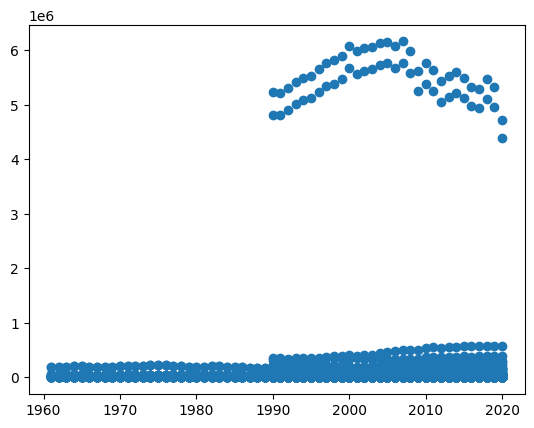

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
145,GT,Emissions Totals,840,United States of America,7234,Direct emissions (N2O),5064,Crop Residues,1990,1990,3050,FAO TIER 1,kilotonnes,59.1240,E,Estimated value,NaN
147,GT,Emissions Totals,840,United States of America,7236,Indirect emissions (N2O),5064,Crop Residues,1990,1990,3050,FAO TIER 1,kilotonnes,13.3029,E,Estimated value,NaN
148,GT,Emissions Totals,840,United States of America,7230,Emissions (N2O),5064,Crop Residues,1990,1990,3050,FAO TIER 1,kilotonnes,72.4269,E,Estimated value,NaN
150,GT,Emissions Totals,840,United States of America,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1990,1990,3050,FAO TIER 1,kilotonnes,19193.1314,E,Estimated value,NaN
152,GT,Emissions Totals,840,United States of America,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1990,1990,3050,FAO TIER 1,kilotonnes,19193.1314,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,GT,Emissions Totals,840,United States of America,7230,Emissions (N2O),6819,Other,1990,1990,3050,FAO TIER 1,kilotonnes,88.6000,E,Estimated value,NaN
6719,GT,Emissions Totals,840,United States of America,7273,Emissions (CO2),6819,Other,1990,1990,3050,FAO TIER 1,kilotonnes,4730.0000,E,Estimated value,NaN
6720,GT,Emissions Totals,840,United States of America,724413,Emissions (CO2eq) from CH4 (AR5),6819,Other,1990,1990,3050,FAO TIER 1,kilotonnes,420.0000,E,Estimated value,NaN
6721,GT,Emissions Totals,840,United States of America,724313,Emissions (CO2eq) from N2O (AR5),6819,Other,1990,1990,3050,FAO TIER 1,kilotonnes,23479.0000,E,Estimated value,NaN


In [4]:
df_emissions = df_emissions.loc[df_emissions['Source'] == 'FAO TIER 1']
df_emissions = df_emissions.loc[df_emissions['Value'] >= 0]

plt.scatter(df_emissions['Year'],df_emissions['Value'])
plt.show()

df_emissions['Element'].unique()

# p=df_emissions['Value'] == 0
# p.sum()

# FAO TIER 1


p=df_emissions.loc[df_emissions['Year'] == 1990]
p

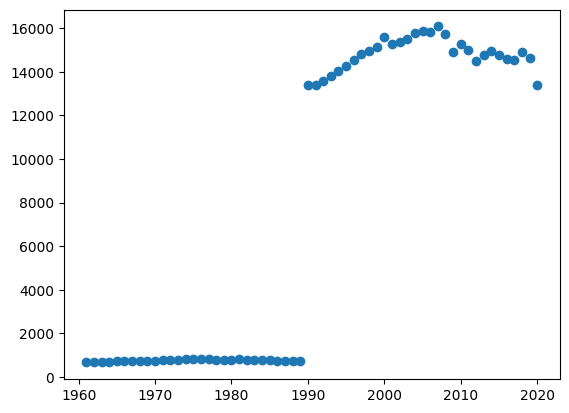

In [5]:
# typeOfEmissions = df_emissions['Element'].unique()

# for eachEmission in typeOfEmissions:
years = df_emissions['Year'].unique()

# p = df_emissions.loc[df_emissions['Year'] == 1961]
# print(p.Value.sum())

df_emissions_overall = pd.DataFrame()

totalEmissions = []

for eachYear in years:
    
    df_for_that_year = df_emissions.loc[df_emissions['Year'] == eachYear]
    totalEmissions.append(df_for_that_year['Value'].sum())

# emissions in kilotonnes to megatonnes conversion
# totalEmissions = np.array(totalEmissions)
# totalEmissions = (totalEmissions - np.mean(totalEmissions))/np.std(totalEmissions)
totalEmissions = np.array(totalEmissions)
totalEmissions = totalEmissions/1000

df_emissions_overall = pd.DataFrame({
    'year': years, 
    'total_emissions': totalEmissions
})

plt.scatter(df_emissions_overall['year'], df_emissions_overall['total_emissions'])
plt.show()

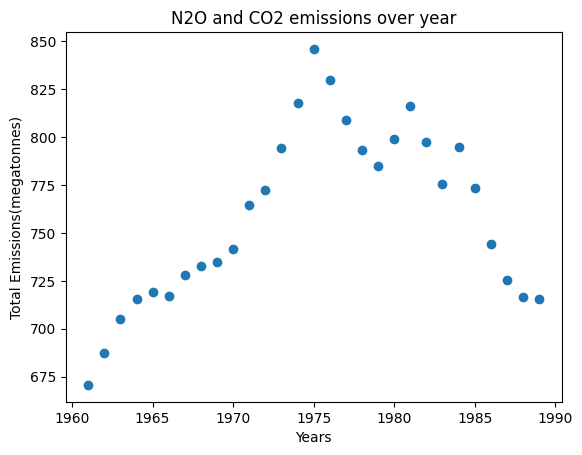

In [6]:

df_before = df_emissions_overall.loc[df_emissions_overall['year'] < 1990]
df_before.head()

plt.title("N2O and CO2 emissions over year")
plt.xlabel("Years")
plt.ylabel("Total Emissions(megatonnes)")
plt.scatter(df_before['year'], df_before['total_emissions'])
plt.savefig('emissions_years.png')
plt.show()

In [7]:
pickle_path = "./data/processed/emissionsVStime.pkl"

with open(pickle_path, "wb") as pfile:
    pickle.dump(df_emissions_overall, pfile)
    pickle.dump({'Unit': 'megatonnes'}, pfile)

df_emissions_overall

,year,total_emissions
0,1961,670.691137
1,1962,687.495281
2,1963,705.308444
3,1964,715.356844
4,1965,719.030654
5,1966,717.083463
6,1967,728.304944
7,1968,732.883062
8,1969,734.984595
9,1970,741.759555
